# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
! pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 74.0 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp310-cp310-linux_x86_64.whl size=3301371 sha256=039df4bd090a08e8f620198fa6f43744e297a521e442ffe73a92f7fa59c8ce0b
  Stored in directory: /root/.cache/pip/wheels/9b/e2/80/888fdc098db86b463ff0c83ae5e5ca151889e901bc1e9a3a11
Successfully built dlib


In [2]:
! pip install imutils


  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=5df3d233a6a766042fc9f26494e75af0b2c7edaa731f7860bc826f7dcf055fe0
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [3]:
def convert_and_trim_bb(image, rect):
# extract the starting and ending (x, y)-coordinates of the
# bounding box
    startX = rect.left()
    startY = rect.top()
    endX = rect.right()
    endY = rect.bottom()
# ensure the bounding box coordinates fall within the spatial
# dimensions of the image
    startX = max(0, startX)
    startY = max(0, startY)
    endX = min(endX, image.shape[1])
    endY = min(endY, image.shape[0])
# compute the width and height of the bounding box
    w = endX - startX
    h = endY - startY
# return our bounding box coordinates
    return (startX, startY, w, h)

In [4]:
import shutil 
import pandas as pd 
import matplotlib.pyplot as plt
import argparse
import imutils
import time
import dlib
import cv2
import os 

In [6]:
Test_images_dir = "/kaggle/input/test-1"
Target_path = "/kaggle/working/"


test_dir = os.path.join(Target_path,"test")
os.makedirs(test_dir,exist_ok=True)


img_size =(256,256)
preprocceed_test_images = []
for label in os.listdir(Test_images_dir) :
    file_path = os.path.join(Test_images_dir,label)
    for img_ in os.listdir(file_path) :
            img_path = os.path.join(file_path,img_)
            img = cv2.imread(img_path)
            img = cv2.resize(img,img_size)
            cv2.imwrite(os.path.join(test_dir,img_),img)
            preprocceed_test_images.append(os.path.join(test_dir,img_))
print(preprocceed_test_images)

['/kaggle/working/test/004.jpg', '/kaggle/working/test/002.jpg', '/kaggle/working/test/001.jpg', '/kaggle/working/test/003.jpg']


In [7]:
df = pd.DataFrame()
df["preprocceed_test_images"] = preprocceed_test_images
df.head()

,preprocceed_test_images
0,/kaggle/working/test/004.jpg
1,/kaggle/working/test/002.jpg
2,/kaggle/working/test/001.jpg
3,/kaggle/working/test/003.jpg


In [8]:
detector = dlib.get_frontal_face_detector()

In [9]:
image = cv2.imread(df["preprocceed_test_images"][2])
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(rgb) ;
# plt.imshow(image) ;    

In [10]:
start = time.time()
print("[INFO[ performing face detection with dlib...")
rects = detector(rgb)
end = time.time()
print("[INFO] face detection took {:.4f} seconds".format(end - start))

[INFO[ performing face detection with dlib...
[INFO] face detection took 0.0141 seconds


[(93, 69, 72, 72)]


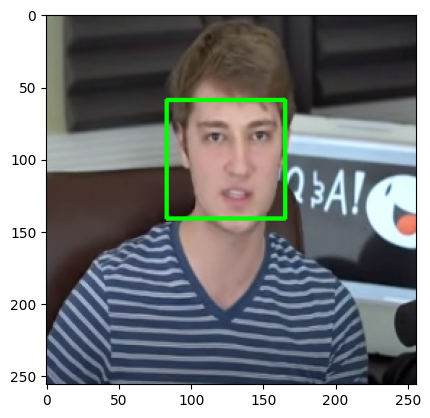

In [12]:
plt.imshow(image)
boxes = [convert_and_trim_bb(image, r) for r in rects]
print(boxes)
# loop over the bounding boxes
for (x, y, w, h) in boxes:
# draw the bounding box on our image
    cv2.rectangle(rgb, (x-10, y-10), (x+w, y+h), (0, 255, 0), 2)
# show the output image
plt.imshow(rgb) ;
